In [1]:
from IPython.display import Image

# Querying 1.X billion reddit comments
# with python



# About me

Daniel Rodriguez

Data Scientist and Software Developer at Continuum Analytics.
Anaconda Cluster

Bogotá, Colombia now in Austin, TX

- [twitter.com/danielfrg](twitter.com/danielfrg)
- [github.com/danielfrg](github.com/danielfrg)
- [danielfrg.com](danielfrg.com)


# What is this talk about?

Querying 1.7 billion reddit comments **with** python

Not **in** python

We are going to write python, but the engine is C/C++ (Impala)

# What is this talk about

- Create data science "friendly" clusters

- ETL plus a little bit on data formats

- Querying data with some new python libraries plus some plots

Assumes some basic knowledge of big data tools like HDFS, Map Reduce, Spark or similar

# Data

Reddit.com - The frontpage of the Internet

[I have every publicly available Reddit comment for research. ~ 1.7 billion comments @ 250 GB compressed. Any interest in this?](https://www.reddit.com/r/datasets/comments/3bxlg7/i_have_every_publicly_available_reddit_comment/)

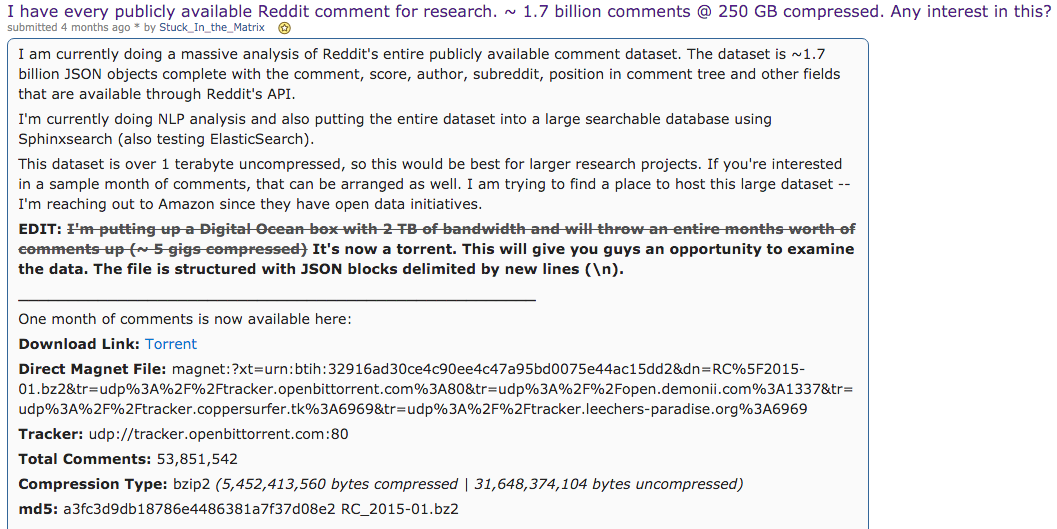

In [2]:
Image(filename='images/data.png') 

# Data

Is available on S3: `s3://blaze-data/reddit/json`

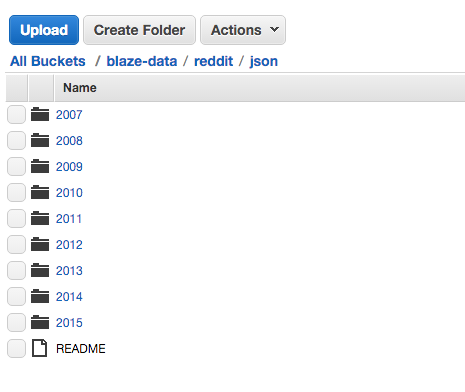

In [3]:
Image(filename='images/s3.png') 

New monthly dumps at: http://pan.whatbox.ca:36975/reddit/comments/monthly/

# Clusters

Big Data technologies (Hadoop zoo) are here to stay.

Really good management tools for IT/DevOps people from Cloudera and Hortonworks

- Automated deployment and configuration

- Customizable monitoring and reporting

- Effortless, robust troubleshooting

- Zero downtime maintenance: rolling upgrades and rollbacks

- Security: Kerberos, LDAP

# Clusters

Data science friendly clusters

 Some of the features before plus:

- Data analysis package and environment managment

- Interactive access to the cluster (Jupyter Notebook)

- Short living clusters (?)

- CLI instead of UI (?)

- More freedom (maybe not that obsesed with security) (?)

Still requires to know what you are doing: AWS, keypairs, SSH. No magic.

# Clusters: DataScienceBox

Command line utility to create instances in the cloud ready for data science. Includes conda package management plus some Big Data frameworks (spark).

```
$ pip install datasciencebox
```

CLI will be available:

```
$ datasciencebox
$ dsb
```

# Clusters: DataScienceBox

Config `dsbfile` file:

``` python
ID = 'daniel'

CLOUD = 'aws'
NUMBER_NODES = 2
AWS_KEY = ''
AWS_SECRET = ''
AWS_KEYNAME = ''
AWS_REGION = 'us-east-1'
AWS_IMAGE = 'ami-d05e75b8'
AWS_SIZE = 'm3.large'
AWS_SECURITY_GROUPS = ['default']
AWS_ROOT_SIZE = 100
AWS_ROOT_TYPE = 'gp2'

USERNAME = 'ubuntu'
KEYPAIR = '~/.ssh/mykey.pem'
```

```
$ dsb up
```

# Clusters: DataScienceBox

```
$ dsb install miniconda
```

    $ dsb install conda numpy

```
$ dsb install notebook
$ dsb open notebook  # Opens a browser
```

# Clusters: DataScienceBox

```
$ dsb install hdfs
```

```
$ dsb install spark
```

```
$ dsb install impala
```

# Clusters: Anaconda Cluster

An iteration on DataScienceBox with some enterprise customers in mind

More features, more frameworks, more stable, more support

```
$ conda install anaconda-client
$ anaconda login
$ conda install anaconda-cluster -c anaconda-cluster
```

Not 100% free: 4 free nodes.

Soon 16 free nodes in the cloud 4 in-house.

# Clusters: Anaconda Cluster

```
$ acluster

Usage: acluster [OPTIONS] COMMAND [ARGS]...

  Anaconda Cluster CLI. Tools for managing conda on a cluster and deploying
  analytics engines.

Options:
  --version   Show the version and exit.
  -h, --help  Show this message and exit.

Commands:
  cmd        Run a command across the cluster
  conda      Execute remote conda commands on the cluster
  create     Create a cluster
  destroy    Destroy a cluster
  function   Execute a salt module
  get        Download a file from the cluster
  history    Display the most recently executed commands
  info       Information about the Anaconda Cluster client installation
  install    Install a plugin
  list       List the clusters, profiles, or providers
  open       Open an app UI in a browser
  provision  Default provisioning of a cluster
  put        Upload a file to the cluster
  restart    Restart a plugin or service
  ssh        SSH into cluster nodes
  status     Get the status of a service or plugin
  stop       Stop a service or plugin
  submit     Execute a file on the cluster
  sync       Sync formulas

```

# Clusters: Anaconda Cluster

```
$ acluster install
Usage: acluster install [OPTIONS] COMMAND1 [ARGS]... [COMMAND2 [ARGS]...]...

  Install plugins on the cluster

Options:
  -x, --cluster TEXT              Cluster name
  -l, --log-level [info|debug|error]
                                  Library logging level  [default: info]
  -h, --help                      Show this message and exit.

Commands:
  conda             Install (mini)conda
  dask-cluster      Setup a Dask distributed cluster
  elasticsearch     Install Elasticsearch
  ganglia           Install Ganglia
  hdfs              Install HDFS
  hive              Install Hive
  impala            Install Impala
  ipython-parallel  Install IPython Parallel
  kibana            Install Kibana
  logstash          Install Logstash
  notebook          Install Jupyter Notebook
  salt              Install Salt
  spark-standalone  Install Spark (standalone)
  spark-yarn        Install Spark (YARN)
  storm             Install Storm
  yarn              Install YARN
  zookeeper         Install Zookeeper
```

# Clusters: Anaconda Cluster

Provider:

```
aws:
  cloud_provider: ec2
  keyname: {{ keyname in aws }}
  location: us-east-1
  private_key: ~/.ssh/{{ keyname in aws }}.pem
  secret_id: {{ aws key }}
  secret_key: {{ aws secret }}
```

Profile:

```
name: impala-profile
provider: aws
user: ubuntu
num_nodes: 8
node_id: ami-08faa660  # Ubuntu 12.04
node_type: m3.2xlarge
root_size: 1000
plugins:
  - hdfs:
      namenode_dirs:
        - /data/dfs/nn
      datanode_dirs:
        - /data/dfs/dn
  - hive
  - impala
  - notebook
```

Launch cluster:

```
$ acluster create impala-cluster -p impala-profile
```

# Clusters: Anaconda Cluster

```
$ acluster conda install -c r r-essentials
Installing packages on cluster "impala": r-essentials

Node "ip-172-31-0-186.ec2.internal":
	Successful actions: 1/1
Node "ip-172-31-0-190.ec2.internal":
	Successful actions: 1/1
Node "ip-172-31-0-182.ec2.internal":
	Successful actions: 1/1
Node "ip-172-31-0-189.ec2.internal":
	Successful actions: 1/1
Node "ip-172-31-0-191.ec2.internal":
	Successful actions: 1/1
Node "ip-172-31-0-183.ec2.internal":
	Successful actions: 1/1
Node "ip-172-31-0-184.ec2.internal":
	Successful actions: 1/1
Node "ip-172-31-0-187.ec2.internal":
	Successful actions: 1/1
Node "ip-172-31-0-185.ec2.internal":
	Successful actions: 1/1
Node "ip-172-31-0-188.ec2.internal":
	Successful actions: 1/1
```

# Clusters: Under the Hood

Both DSB and AC use a very similar approach: SSH for basic stuff and then use Salt

![Saltstack](http://unbridled.info/dev/saltstack/wp-content/uploads/2014/12/saltStack_horizontal_dark_400x126.png)

Salt: https://github.com/saltstack/salt

- Fast: ZMQ instead of SSH
- Secure
- Scalable to thousands of nodes
- Declarative yaml languague instead of bash scripts

```
numpy-install:
  conda.installed:
    - name: numpy
    - require:
        - file: config-file
```

- A lot of free formulas online

# Data: Moving the data

Move data from S3 to our HDFS cluster

```
hadoop distcp -Dfs.s3n.awsAccessKeyId={{ }} -Dfs.s3n.awsSecretAccessKey={{ }} s3n://blaze-data/reddit/json/*/*.json /user/ubuntu
```

# Data: Parquet

![Parquet](https://parquet.apache.org/assets/img/parquet_logo.png)

Apache Parquet is a columnar storage format available to any project in the Hadoop ecosystem, regardless of the choice of data processing framework, data model or programming language.

# Data: Parquet

![CS](http://docs.aws.amazon.com/redshift/latest/dg/images/03a-Rows-vs-Columns.png)

![CS](http://docs.aws.amazon.com/redshift/latest/dg/images/03b-Rows-vs-Columns.png)

[1] http://docs.aws.amazon.com/redshift/latest/dg/c_columnar_storage_disk_mem_mgmnt.html

# Data: Load

<pre>
hive > CREATE TABLE <b>reddit_json</b> (
  archived                 boolean,
  author                   string,
  author_flair_css_class   string,
  author_flair_text        string,
  body                     string,
  controversiality         int,
  created_utc              string,
  distinguished            string,
  downs                    int,
  edited                   boolean,
  gilded                   int,
  id                       string,
  link_id                  string,
  name                     string,
  parent_id                string,
  removal_reason           string,
  retrieved_on             timestamp,
  score                    int,
  score_hidden             boolean,
  subreddit                string,
  subreddit_id             string,
  ups                      int
)
ROW FORMAT
    serde 'com.amazon.elasticmapreduce.JsonSerde'
    with serdeproperties ('paths'='archived,author,author_flair_css_class,author_flair_text,body,controversiality,created_utc,distinguished,downs,edited,gilded,id,link_id,name,parent_id,removal_reason,retrieved_on,score,score_hidden,subreddit,subreddit_id,ups');
</pre>

```
hive > LOAD DATA INPATH '/user/ubuntu/*.json' INTO TABLE reddit_json;
```

# Data: Transform

<pre>
hive > CREATE TABLE <b>reddit_parquet</b> (
  archived                 boolean,
  author                   string,
  author_flair_css_class   string,
  author_flair_text        string,
  body                     string,
  controversiality         int,
  created_utc              string,
  distinguished            string,
  downs                    int,
  edited                   boolean,
  gilded                   int,
  id                       string,
  link_id                  string,
  name                     string,
  parent_id                string,
  removal_reason           string,
  retrieved_on             timestamp,
  score                    int,
  score_hidden             boolean,
  subreddit                string,
  subreddit_id             string,
  ups                      int,
  created_utc_t            timestamp
)
STORED AS PARQUET;
</pre>

<pre>
hive > SET dfs.block.size=1g;

hive > INSERT OVERWRITE TABLE reddit_parquet select *, <b>cast(cast(created_utc as double) as timestamp) as created_utc_t</b> FROM reddit_json;
</pre>